## Group No : 167

## Group Member Names:
1. MANU JOSE <2021fc04342@wilp.bits-pilani.ac.in>
2. MATHEW STEPHEN <2021fc04270@wilp.bits-pilani.ac.in >
3. SAI KRISHNA R <2021fc04274@wilp.bits-pilani.ac.in>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Problem Statement

### Dataset

In [51]:
## Import packages
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import keras
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
np.random.seed(0)
from datetime import datetime as dt

#### Data Processing

In [2]:
## text file to dataframe
def dataframe_txt(s):
    df = pd.read_csv(s, header=None, delim_whitespace=True)
    return df.values

In [24]:
# load a dataset group, such as train or test
def data_file_load(type):
  path = '/content/drive/MyDrive/Bits/Sem 3/dl_assignment 2/UCI HAR Dataset/UCI HAR Dataset/'
  filepath = path + type + '/Inertial Signals/'
  filenames = list()
	# total acceleration
  filenames += ['total_acc_x_'+type+'.txt', 'total_acc_y_'+type+'.txt', 'total_acc_z_'+type+'.txt']
	# body acceleration
  filenames += ['body_acc_x_'+type+'.txt', 'body_acc_y_'+type+'.txt', 'body_acc_z_'+type+'.txt']
	# body gyroscope
  filenames += ['body_gyro_x_'+type+'.txt', 'body_gyro_y_'+type+'.txt', 'body_gyro_z_'+type+'.txt']
  loaded = list()
  for name in filenames:
    data = dataframe_txt(filepath + name)
    loaded.append(data)
	# stack type so that features are the 3rd dimension
  X = np.dstack(loaded)
  y = dataframe_txt(path + type + '/y_'+type+'.txt')
  return X, y

In [25]:
## Loading files into train and test variables
def train_test_data():
    trainX, trainy = data_file_load('train')
    testX, testy = data_file_load('test')
    trainy = trainy - 1
    testy = testy - 1
    print("train X data shape: ",trainX.shape)
    print("train y data shape: ", trainy.shape)
    print("test X data shape: ", testX.shape)
    print("test y data shape: ", testy.shape)
    return trainX, trainy, testX, testy

In [26]:
train_x, train_y, test_x, test_y = train_test_data()

train X data shape:  (7352, 128, 9)
train y data shape:  (7352, 1)
test X data shape:  (2947, 128, 9)
test y data shape:  (2947, 1)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

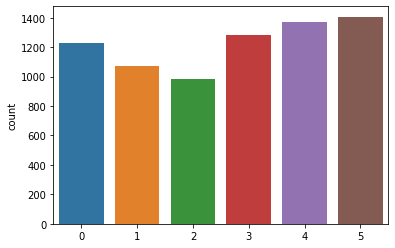

In [17]:
## count of each target variables present in the training dataset
sns.countplot(np.squeeze(train_y))

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

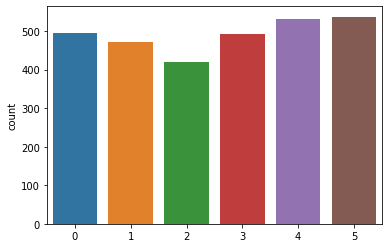

In [18]:
## count of each target variables present in the testing dataset
sns.countplot(np.squeeze(test_y))

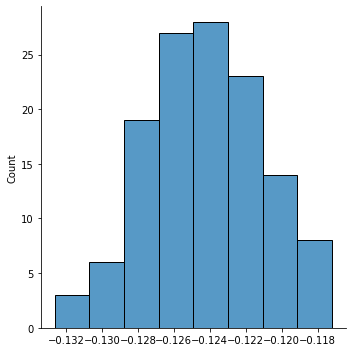

In [44]:
## Total acceleartion on X axis for a particular timestep by person - 1
sns.displot(train_x[0,:,1])

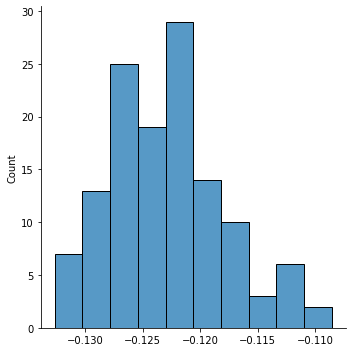

In [43]:
## Total acceleartion on Y axis for a particular timestep by person - 0
sns.displot(train_x[1,:,1])

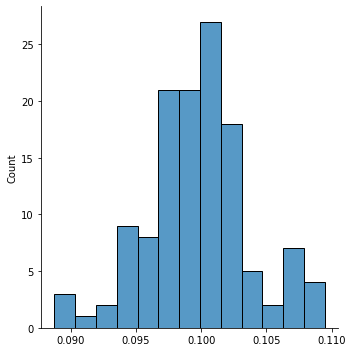

In [45]:
## Total acceleartion on Z axis for a particular timestep by person - 1
sns.displot(train_x[0,:,2])

In [56]:
## Changing class labels into a suitable categorical format
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

#### Model Building

In [67]:
num_timesteps, num_features = train_x.shape[1], train_x.shape[2]
model = Sequential()
model.add(LSTM(256, input_shape=(num_timesteps,num_features),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(126,return_sequences = True))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='he_uniform'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(32, kernel_size=3, padding='valid', kernel_initializer='he_uniform'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))

Justification - 
1. Total Number of layers - 13, SLTM layers - 2, 1D CNN layers - 2, Maxpooling layers - 2, dense layers - 2, dropuout layers - 4
2. Activation function used in each hidden layer is 'relu' . ReLU
is used as it is computationally efficient and does not suffer
from the vanishing gradient problem.
3. Activation function used in the output layer is 'Softmax'.
Sigmoid is used as it is a multi class classification problem.
4. Total number of trainable parameters - 592,554 .
5. Dropout probability size in each layer is decided by the effect present on the overfitting percentage on validation accuracy


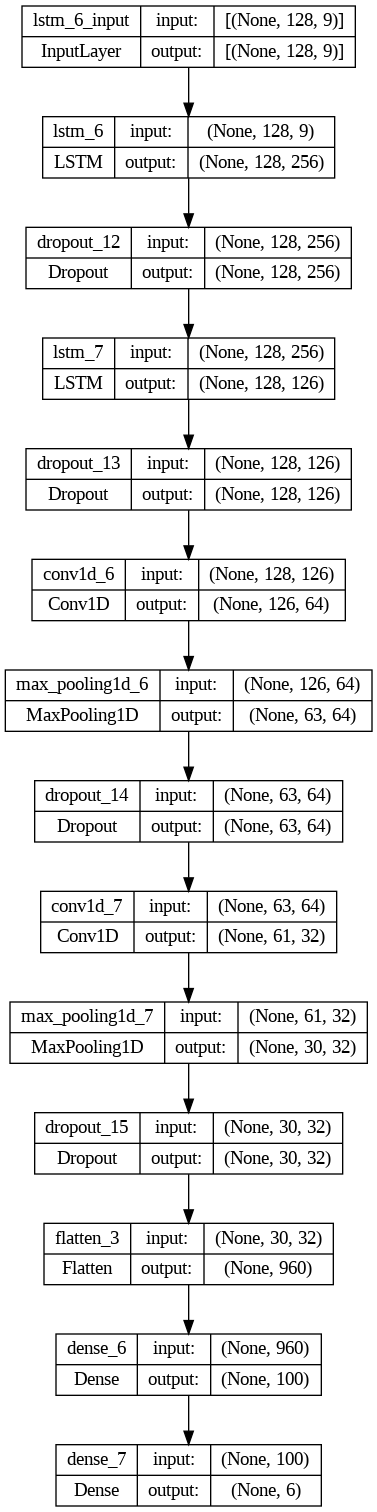

In [68]:
#plotting model
plot_model(model, show_shapes=True, show_layer_names=True)

In [69]:
##  Choosing Adam as the optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
## Compiling the built model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Justification:
1. Optimizer
2.Learning rate
3.loss function

In [70]:
## summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128, 256)          272384    
                                                                 
 dropout_12 (Dropout)        (None, 128, 256)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128, 126)          193032    
                                                                 
 dropout_13 (Dropout)        (None, 128, 126)          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 126, 64)           24256     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 63, 64)           0         
 1D)                                                             
                                                      

In [ ]:
start = dt.now()
history = model.fit(train_x, train_y, epochs=20, batch_size=32, verbose=2, validation_split=0.25)
running_secs = (dt.now() - start).seconds

Epoch 1/20
173/173 - 151s - loss: 0.6919 - accuracy: 0.7147 - val_loss: 0.4555 - val_accuracy: 0.8662 - 151s/epoch - 872ms/step
Epoch 2/20
173/173 - 147s - loss: 0.2199 - accuracy: 0.9117 - val_loss: 0.3559 - val_accuracy: 0.9195 - 147s/epoch - 851ms/step
Epoch 3/20
173/173 - 147s - loss: 0.1633 - accuracy: 0.9334 - val_loss: 0.3072 - val_accuracy: 0.9091 - 147s/epoch - 848ms/step
Epoch 4/20


In [ ]:
## Plotting the accuracy and loss graph
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.5)
fig, axes = plt.subplots(1,2, figsize=(20,5), sharex=True)
axes[0].set_title('Loss')
axes[0].plot(history.history['loss'], label='train', )
axes[0].plot(history.history['val_loss'], label='test')
axes[0].legend()
#plot accuracy during training
axes[1].set_title('Accuracy')
axes[1].plot(history.history['accuracy'], label='train')
axes[1].plot(history.history['val_accuracy'], label='test')
axes[1].legend()
plt.show()

In [ ]:
## Evaluating the model
print(model.evaluate(test_x,test_y))

In [ ]:
# Predicting the test data using the trained model
y_pred=model.predict(test_x)

In [ ]:
## Confusion matrix for the test data
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(test_y, axis=1)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
## plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,linewidths=0.1, )
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
## Classification report
target_names = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
## Total timme take to train the model
print(running_secs)